In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Reading in Training set from 2011
data_2011 = pd.read_csv('../data/train_master_imputed_dummified.csv')

# Note: The index was copied into a column for some reason? 
# ALSO! We still have DRate Transformed... So I am dropping that too!
data_2011 = data_2011.drop('Unnamed: 0', axis=1)
data_2011 = data_2011.drop('DRate_Transformed', axis=1)

# Setting INSTNAME to index and dropping the UNITID (we can use this later if we want)
data_2011 = data_2011.set_index('INSTNAME')
data_2011 = data_2011.drop('UNITID', axis=1)

data_2011.columns = [column.replace(' ', '_') for column in data_2011.columns]

data_2011 = data_2011.drop(['GROFFER', 'Prog\nLength__8', 'ICLEVEL_x__1'], axis=1)

train_features = "ICLEVEL_y__1 + TOTALCOMPLETIONS_100FTE + TOTAL_ENROLLMENT_BLACK_TOT + TOTAL03_REVENUE + TOTAL_ENROLLMENT_WHITE_TOT + STUDSERV01 + TOTAL_FULL_TIME + TOTAL_ENROLLMENT_ASIAN_TOT + TOTAL_ENROLLMENT_HISP_TOT + INSTCAT__3 + HBCU_y + Ethnic_Code__5 + CENSUS_REGION__3 + CENSUS_REGION__1"
# train_features = ' + '.join(data_2011.columns.values)
lm = smf.ols(formula='DRate ~ ' + train_features, data=data_2011).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DRate   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     156.1
Date:                Sat, 10 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:57:04   Log-Likelihood:                -14174.
No. Observations:                4227   AIC:                         2.838e+04
Df Residuals:                    4212   BIC:                         2.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     35.0475      1.779     19.702      0.000        31.560    38.535
ICLEVEL_y__1                  -9.5126      0.254    -37.502      0.000       -10.010    -9.015
TOTALCOMPLETIONS_100FTE       -0.0119      0.003     -4.421      0.000        -0.017    -0.007
TOTAL_ENROLLMENT_BLACK_TOT     0.0002   9.65e-05      1.869      0.062     -8.82e-06     0.000
TOTAL03_REVENUE            -1.475e-09   3.51e-10     -4.205      0.000     -2.16e-09 -7.87e-10
TOTAL_ENROLLMENT_WHITE_TOT     0.0001   4.92e-05      2.962      0.003      4.93e-05     0.000
STUDSERV01                  1.201e-08    1.2e-08      1.001      0.317     -1.15e-08  3.55e-08
TOTAL_FULL_TIME            -7.422e-05    5.6e-05     -1.326      0.185        -0.000  3.55e-05
TOTAL_ENROLLMENT_ASIAN_TOT    -0.0002      0.000     -1.350      0.177        -0.000  9.19e-05
TOTAL_ENROLLMENT_HISP_TOT   5.134e-05   6.28e-05      0.817      0.414     -7.18e-05     0.000
INSTCAT__3                     7.1029      0.529     13.438      0.000         6.067     8.139
HBCU_y                        -7.0712      1.075     -6.581      0.000        -9.178    -4.965
Ethnic_Code__5                -3.9213      0.719     -5.455      0.000        -5.331    -2.512
CENSUS_REGION__3               1.0952      0.255      4.291      0.000         0.595     1.596
CENSUS_REGION__1              -2.0002      0.279     -7.156      0.000        -2.548    -1.452
==============================================================================
Omnibus:                      431.760   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1228.332
Skew:                           0.554   Prob(JB):                    1.87e-267
Kurtosis:                       5.398   Cond. No.                     9.76e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.76e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/danny/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


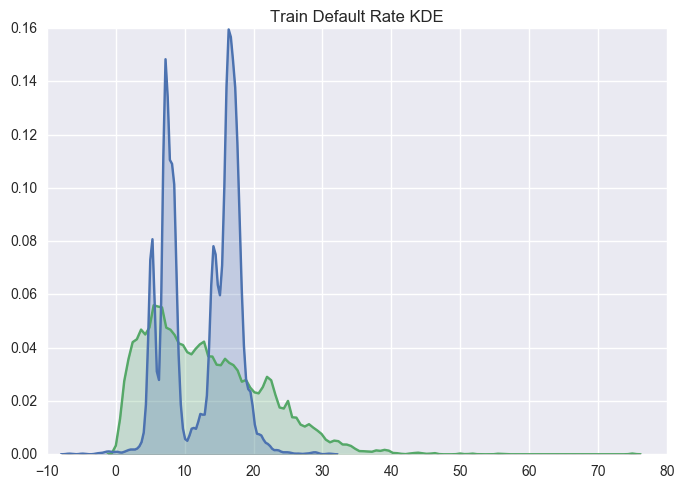

In [39]:
sns.set(color_codes=True)

# KDE Data 2011
ax = plt.axes()
# ax.set_title("Default Rate KDE")
kde = sns.kdeplot(data_2011['DRate'], bw = 0.4, shade=True, legend=False, color='g')
# plt.legend("A")

# KDE OLS fitted 2011
ax = plt.axes()
ax.set_title("Train Default Rate KDE")
kde = sns.kdeplot(lm.fittedvalues, bw = 0.4, shade=True, legend=False, color='b')
fig = kde.get_figure()
# plt.legend("F")
# fig.add_legend("Fitted")
fig.savefig("kde-plot-train-OLS.png")

# data_2012 = pd.read_csv('../data/test_master_imputed_dummified.csv')

# # KDE Data 2012
# ax = plt.axes()
# # ax.set_title("Test Default Rate KDE")
# kde = sns.kdeplot(data_2012['DRate'], bw = 0.4, shade=True, legend=False, color='g')
# # fig = kde.get_figure()

# data_2012.columns = [column.replace(' ', '_') for column in data_2012.columns]
# pandas_features = train_features.split(' + ')
# lm_predictions = lm.predict(data_2012[pandas_features])

# # # KDE OLS fitted 2012
# ax = plt.axes()
# ax.set_title("Test Default Rate KDE")
# kde = sns.kdeplot(lm_predictions, bw = 0.4, shade=True, legend=False, color='b')
# fig = kde.get_figure()
# fig.savefig("kde-plot-test-OLS.png")

In [40]:
# Obtain RMSE of our OLS on training data
mean_squared_error(data_2011['DRate'], lm.fittedvalues) ** 0.5

6.9187815737197012

In [41]:
data_2012 = pd.read_csv('../data/test_master_imputed_dummified.csv')
data_2012.columns = [column.replace(' ', '_') for column in data_2012.columns]

In [42]:
pandas_features = train_features.split(' + ')
lm_predictions = lm.predict(data_2012[pandas_features])

In [43]:
# Obtain RMSE of our OLS on testing data
mean_squared_error(data_2012['DRate'], lm_predictions) ** 0.5

6.5203009031565111

/Users/danny/miniconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


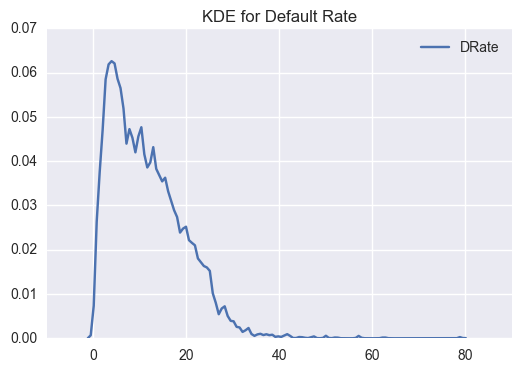

In [34]:
ax = plt.axes()
ax.set_title("KDE for Default Rate")
kde = sns.kdeplot(data_2012['DRate'], bw = 0.4)
fig = kde.get_figure()
# fig.savefig("kde_plot.png")

In [39]:
med_2012 = np.median(data_2012['DRate'])
med_2011 = np.median(data_2011['DRate'])
print(med_2011, med_2012)

11.3 9.9


In [40]:
lm = smf.ols(formula='DRate ~ ' + train_features, data=data_2012).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DRate   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     177.6
Date:                Fri, 09 Dec 2016   Prob (F-statistic):               0.00
Time:                        16:26:07   Log-Likelihood:                -14079.
No. Observations:                4309   AIC:                         2.819e+04
Df Residuals:                    4294   BIC:                         2.828e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     30.6890      1.623     18.909      0.000        27.507    33.871
ICLEVEL_y__1                  -9.1155      0.234    -38.983      0.000        -9.574    -8.657
TOTALCOMPLETIONS_100FTE       -0.0173      0.002     -7.182      0.000        -0.022    -0.013
TOTAL_ENROLLMENT_BLACK_TOT     0.0003    8.4e-05      3.624      0.000         0.000     0.000
TOTAL03_REVENUE            -1.064e-09   4.07e-10     -2.618      0.009     -1.86e-09 -2.67e-10
TOTAL_ENROLLMENT_WHITE_TOT     0.0002   4.41e-05      4.498      0.000         0.000     0.000
STUDSERV01                 -8.936e-09   1.17e-08     -0.762      0.446     -3.19e-08  1.41e-08
TOTAL_FULL_TIME               -0.0001   5.05e-05     -2.653      0.008        -0.000  -3.5e-05
TOTAL_ENROLLMENT_ASIAN_TOT    -0.0002      0.000     -1.161      0.246        -0.000     0.000
TOTAL_ENROLLMENT_HISP_TOT   6.905e-05   5.57e-05      1.239      0.215     -4.02e-05     0.000
INSTCAT__3                     6.1310      0.464     13.199      0.000         5.220     7.042
HBCU_y                        -5.6916      0.982     -5.798      0.000        -7.616    -3.767
Ethnic_Code__5                -3.6906      0.660     -5.594      0.000        -4.984    -2.397
CENSUS_REGION__3               1.7024      0.232      7.346      0.000         1.248     2.157
CENSUS_REGION__1              -1.9960      0.254     -7.849      0.000        -2.495    -1.497
==============================================================================
Omnibus:                     1117.305   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5837.829
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       8.226   Cond. No.                     8.35e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.35e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
lm_RMSE_2012 = mean_squared_error(data_2012['DRate'], lm.fittedvalues) ** 0.5

In [42]:
lm_RMSE_2012

6.3498529027363899